In [25]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


from PIL import Image

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Map for human readable class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [3]:
# Training
# 60,000 images of size 28x28 
print(f"Shape of training Image data {x_train}")

Shape of training Image data [[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [4]:
# build network

In [5]:
model = tf.keras.models.Sequential()

In [6]:
model.add(
    tf.keras.layers.Conv2D(
        filters=32, # filters to learn
        kernel_size=(3,3),
        strides=(1,1),
        padding='valid',
        activation='relu',
        input_shape=(28,28,1)
    )
)

In [7]:
# The next layer we will add is a Maxpooling layer. This will reduce the 
# dimensionality of each feature, which reduces the number of parameters that 
# the model needs to learn, which shortens training time.
model.add(
    tf.keras.layers.MaxPooling2D(
        pool_size=(2, 2), # Size feature will be mapped to
        strides=(2, 2) # How the pool "steps" across the feature
    )
)

In [8]:
# We'll now add a dropout layer. This fights overfitting and forces the model to 
# learn multiple representations of the same data by randomly disabling neurons 
# in the learning phase.
model.add(
    tf.keras.layers.Dropout(
        rate=0.25 # Randomly disable 25% of neurons
    )
)

In [9]:

# Output from previous layer is a 3D tensor. This must be flattened to a 1D 
# vector before beiung fed to the Dense Layers.
model.add(
    tf.keras.layers.Flatten()
)

# A dense (interconnected) layer is added for mapping the derived features 
# to the required class.
model.add(
    tf.keras.layers.Dense(
        units=128, # Output shape
        activation='relu' # Rectified Linear Unit Activation Function
    )
)

# Final layer with 10 outputs and a softmax activation. Softmax activation 
# enables me to calculate the output based on the probabilities. 
# Each class is assigned a probability and the class with the maximum 
# probability is the model’s output for the input.
model.add(
    tf.keras.layers.Dense(
        units=10, # Output shape
        activation='softmax' # Softmax Activation Function
    )
)

# Build the model
model.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy, # loss function
    optimizer=tf.keras.optimizers.Adam(), # optimizer function
    metrics=['accuracy'] # reporting metric
)

# Display a summary of the models structure
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [11]:
# Add an empty color dimension as the Convolutional net is expecting this
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Train the CNN on the training data
history = model.fit(
    
      # Training data : features (images) and classes.
      x_train, y_train,
                    
      # number of samples to work through before updating the 
      # internal model parameters via back propagation.
      batch_size=256, 

      # An epoch is an iteration over the entire training data.
      epochs=10, 

      # The model will set apart his fraction of the training 
      # data, will not train on it, and will evaluate the loss
      # and any model metrics on this data at the end of 
      # each epoch. 
      validation_split=0.2, 

      verbose=1) 

Epoch 1/10
188/188 [==============================] - 14s 6ms/step - loss: 5.2454 - accuracy: 0.7600 - val_loss: 0.5293 - val_accuracy: 0.8618
Epoch 2/10
188/188 [==============================] - 1s 4ms/step - loss: 0.5441 - accuracy: 0.8481 - val_loss: 0.3780 - val_accuracy: 0.8716
Epoch 3/10
188/188 [==============================] - 1s 4ms/step - loss: 0.3759 - accuracy: 0.8720 - val_loss: 0.3347 - val_accuracy: 0.8852
Epoch 4/10
188/188 [==============================] - 1s 4ms/step - loss: 0.3172 - accuracy: 0.8887 - val_loss: 0.3082 - val_accuracy: 0.8939
Epoch 5/10
188/188 [==============================] - 1s 4ms/step - loss: 0.2828 - accuracy: 0.8986 - val_loss: 0.3015 - val_accuracy: 0.8952
Epoch 6/10
188/188 [==============================] - 1s 4ms/step - loss: 0.2548 - accuracy: 0.9058 - val_loss: 0.3023 - val_accuracy: 0.8928
Epoch 7/10
188/188 [==============================] - 1s 4ms/step - loss: 0.2372 - accuracy: 0.9112 - val_loss: 0.2903 - val_accuracy: 0.8967
Epoch

In [18]:
# Get Model Predictions for test data
predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(predicted_classes, axis=-1)
print(classification_report(y_test, predicted_classes, target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.84      0.83      0.84      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.88      0.75      0.81      1000
       Dress       0.90      0.90      0.90      1000
        Coat       0.78      0.88      0.83      1000
      Sandal       0.99      0.98      0.98      1000
       Shirt       0.69      0.71      0.70      1000
     Sneaker       0.94      0.98      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.98      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.89      0.89     10000



In [19]:
# single image test

In [21]:
img_path = 'static/images/Nikko_black_sandal.jpg'

'static/images/Nikko_black_sandal.jpg'

In [26]:
img = Image.open(img_path)

In [38]:
img1 = img.resize((28,28), Image.NEAREST)
pix = np.array(img1)

In [35]:
img1

In [42]:
pix1 = np.dot(pix[...,:3], [0.299, 0.587, 0.144])

In [53]:
pix1 = pix1.reshape((28,28,1))

In [55]:
model.predict(pix1)

ValueError: in user code:

    c:\Users\Qasim\anaconda3\envs\ai-env\lib\site-packages\keras\engine\training.py:1586 predict_function  *
        return step_function(self, iterator)
    c:\Users\Qasim\anaconda3\envs\ai-env\lib\site-packages\keras\engine\training.py:1576 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    c:\Users\Qasim\anaconda3\envs\ai-env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    c:\Users\Qasim\anaconda3\envs\ai-env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    c:\Users\Qasim\anaconda3\envs\ai-env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    c:\Users\Qasim\anaconda3\envs\ai-env\lib\site-packages\keras\engine\training.py:1569 run_step  **
        outputs = model.predict_step(data)
    c:\Users\Qasim\anaconda3\envs\ai-env\lib\site-packages\keras\engine\training.py:1537 predict_step
        return self(x, training=False)
    c:\Users\Qasim\anaconda3\envs\ai-env\lib\site-packages\keras\engine\base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    c:\Users\Qasim\anaconda3\envs\ai-env\lib\site-packages\keras\engine\input_spec.py:229 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: (None, 28, 1)


In [56]:
pix1.shape

(28, 28, 1)

In [58]:
x_test[0].shape

(28, 28, 1)

In [63]:
res = model.predict(pix1.reshape(1,28,28,1))

In [66]:
class_names[np.argmax(res, axis=-1)[0]]

'T-shirt/top'

In [67]:
res

array([[4.7221863e-01, 1.4627549e-01, 2.2128876e-01, 2.8026242e-02,
        2.6231841e-03, 1.3461109e-03, 1.2411907e-01, 2.0946090e-06,
        4.0980377e-03, 2.2929828e-06]], dtype=float32)

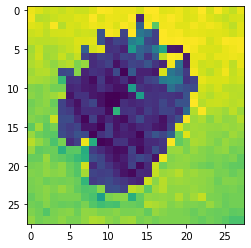

In [68]:
plt.imshow(pix1)

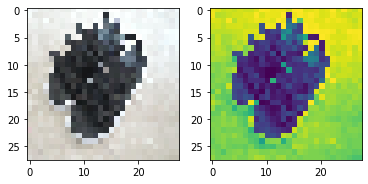

In [80]:
fig, ax = plt.subplots(1,2)

ax[0].imshow(img1)
ax[1].imshow(pix1)

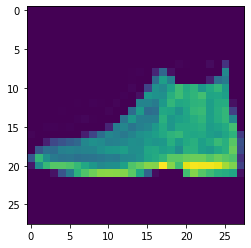

In [69]:
plt.imshow(x_test[0])

In [81]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

In [82]:
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, grayscale=True, target_size=(28, 28))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 1 channel
	img = img.reshape(1, 28, 28, 1)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0

	return img

In [84]:
img2 = load_image(img_path)

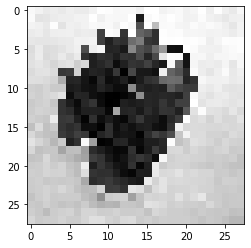

In [91]:
plt.imshow(img2.reshape(28,28,1), cmap='gray')

In [92]:
plt.imshow(img2.reshape(28,28,1), cmap='gray')

array([[[[0.972549  ],
         [0.9529412 ],
         [0.92156863],
         [0.93333334],
         [0.91764706],
         [0.9411765 ],
         [0.9254902 ],
         [0.9254902 ],
         [0.9529412 ],
         [0.99607843],
         [0.9882353 ],
         [0.96862745],
         [0.972549  ],
         [0.972549  ],
         [0.94509804],
         [1.        ],
         [1.        ],
         [0.9529412 ],
         [0.9647059 ],
         [0.9764706 ],
         [0.9490196 ],
         [0.9607843 ],
         [0.99607843],
         [0.9372549 ],
         [0.99215686],
         [0.94509804],
         [0.91764706],
         [0.96862745]],

        [[0.98039216],
         [0.8980392 ],
         [0.90588236],
         [0.9254902 ],
         [0.9372549 ],
         [0.9372549 ],
         [0.9529412 ],
         [0.9529412 ],
         [0.99607843],
         [0.94509804],
         [0.972549  ],
         [0.96862745],
         [0.96862745],
         [1.        ],
         [0.18039216],
         

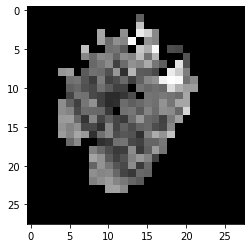

In [98]:
plt.imshow(img2.reshape(28,28,1), cmap='gray')

In [101]:
class_names[np.argmax(model.predict(img2), axis=-1)[0]]

'Dress'